5.1.  Введение

5.2.  Функции потерь

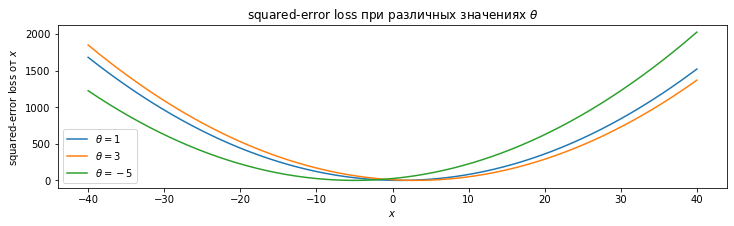

In [8]:
%matplotlib inline
import pymc as pm
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12, 3)
def sqr_err_loss(x, teta): # функция потерь на основе среднеквадратичной ошибки
    return (x - teta)**2

x = np.linspace(-40, 40, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, sqr_err_loss(x, 1), label= r"$\theta = 1$")
plt.plot(x, sqr_err_loss(x, 3), label= r"$\theta = 3$")
plt.plot(x, sqr_err_loss(x, -5), label= r"$\theta = -5$")
plt.xlabel("$x$")
plt.ylabel("squared-error loss от $x$")
plt.title(r"squared-error loss при различных значениях $\theta$")
plt.legend()
plt.show()

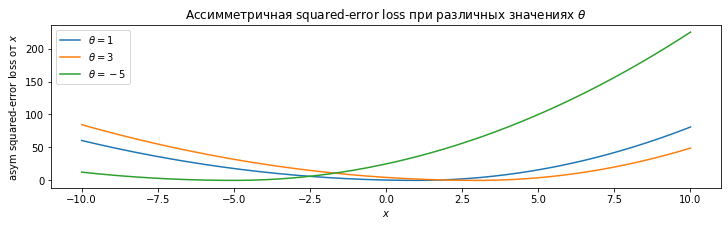

In [55]:
%matplotlib inline
import pymc as pm
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12, 3)
# кусочно-гладкая функция - асимметричная функция потерь на основе квадратичной 
def asym_sq_err_loss(x, teta, const = 0.5): # 0< const <1
    if x > teta:
        return (x - teta)**2
    else:         
        return const*(x - teta)**2


x = np.linspace(-10, 10, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(asym_sq_err_loss, otypes=[float]) 


plt.plot(x, y(x, 1), label= r"$\theta = 1$")
plt.plot(x, y(x, 3), label= r"$\theta = 3$")
plt.plot(x, y(x, -5), label= r"$\theta = -5$")
plt.xlabel("$x$")
plt.ylabel("asym squared-error loss от $x$")
plt.title(r"Ассимметричная squared-error loss при различных значениях $\theta$")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2195: ComplexWarning: Casting complex values to real discards the imaginary part
  res = array(outputs, copy=False, subok=True, dtype=otypes[0])


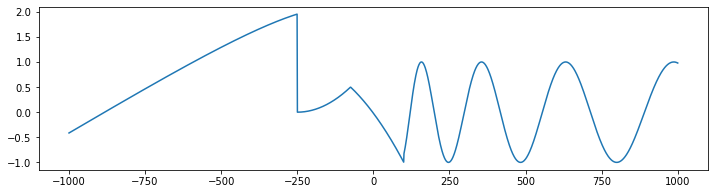

In [53]:
# Пример построения графика сложной кусочно-гладкой функции

%matplotlib inline
import pymc as pm
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12, 3)

def kus_glad_func(x):
    if x < a:
        return np.sin(x**.2)
    elif (a <= x) and (x <= ((a + b) / 2)):
        return (2 * ((x - a) ** 2)) / ((b - a) ** 2)
    elif ((a + b) / 2 <= x) and (x <= b):
        return 1 - (2 * ((x - a) ** 2)) / ((b - a) ** 2)
    else:
        return np.cos(x**(1/2))


x = np.linspace(-1000, 1000, 2000)
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(kus_glad_func, otypes=[float])


a,b = -250,100
graph1 = plt.plot(x, y(x))

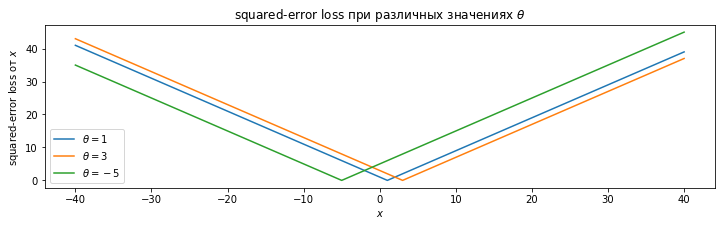

In [61]:
figsize(12, 3)
def abs_loss(x, teta): # функция потерь на основе абсолютного 
                    #значения ошибки, растущая линейно с ростом ошибки
    return ((x - teta)**2)**(1/2)

x = np.linspace(-40, 40, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, abs_loss(x, 1), label= r"$\theta = 1$")
plt.plot(x, abs_loss(x, 3), label= r"$\theta = 3$")
plt.plot(x, abs_loss(x, -5), label= r"$\theta = -5$")
plt.xlabel("$x$")
plt.ylabel("squared-error loss от $x$")
plt.title(r"squared-error loss при различных значениях $\theta$")
plt.legend()
plt.show()

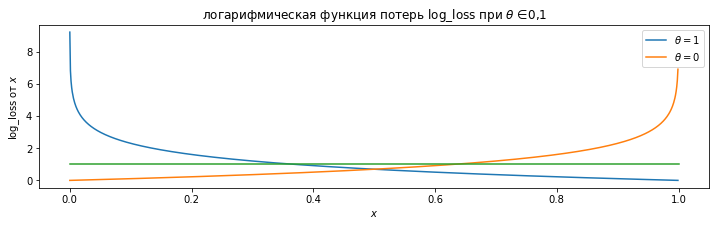

In [135]:
%matplotlib inline
import pymc as pm
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12, 3)
# кусочно-гладкая функция - асимметричная функция потерь на основе квадратичной 
def log_loss(x, teta = 0): # 0< x <1
    if 0 < x < 1:
        return -teta*np.log(x)-(1-teta)*np.log(1-x)
    else:         
        return None


x = np.linspace(0.0001, 1, 1000) # 1000 точек на отрезке [0 ; 1] оси Ox
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(log_loss, otypes=[float]) 


plt.plot(x, y(x, 1), label= r"$\theta = 1$")
plt.plot(x, y(x, 0), label= r"$\theta = 0$")
plt.plot(x, x/x)
plt.xlabel("$x$")
plt.ylabel("log_loss от $x$")
plt.title(r"логарифмическая функция потерь log_loss при $\theta$ ∈0,1")
plt.legend()
plt.show()

Вот несколько примеров более многообещающих функций потерь:

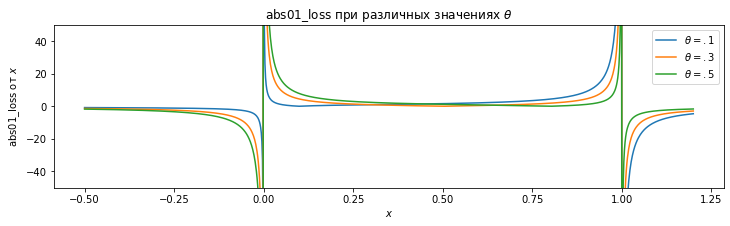

In [68]:
figsize(12, 3)
def abs01_loss(x, teta): # логарифмическая функция потерь
    return abs(x - teta)/(x*(1-x))

x = np.linspace(-.5, 1.2, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, abs01_loss(x, .1), label= r"$\theta = .1$")
plt.plot(x, abs01_loss(x, .5), label= r"$\theta = .3$")
plt.plot(x, abs01_loss(x, .8), label= r"$\theta = .5$")
plt.xlabel("$x$")
plt.ylabel("abs01_loss от $x$")
plt.title(r"abs01_loss при различных значениях $\theta$")
plt.ylim(-50, 50)
plt.legend()
plt.show()

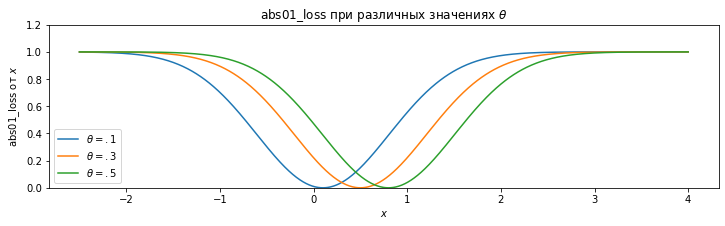

In [76]:
figsize(12, 3)
def exp_loss(x, teta): # логарифмическая функция потерь
    return 1 - np.exp(-(x - teta)**2)

x = np.linspace(-2.5, 4, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, exp_loss(x, .1), label= r"$\theta = .1$")
plt.plot(x, exp_loss(x, .5), label= r"$\theta = .3$")
plt.plot(x, exp_loss(x, .8), label= r"$\theta = .5$")
plt.xlabel("$x$")
plt.ylabel("abs01_loss от $x$")
plt.title(r"abs01_loss при различных значениях $\theta$")
plt.ylim(0, 1.2)
plt.legend()
plt.show()

In [ ]:
 функция потерь 𝐿(𝜃,𝜃̂^)=log(1 + exp(−(𝜃−𝜃̂^)**2))

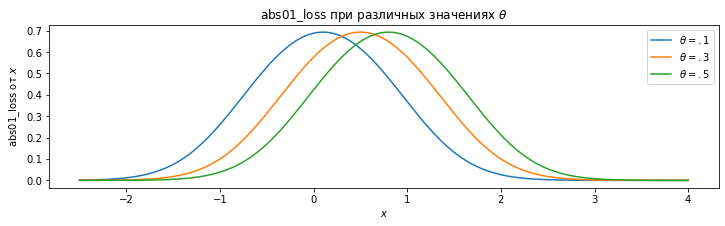

In [120]:
figsize(12, 3)
def logist_loss(x, teta): #  функция потерь
    return np.log(1 + np.exp(-(x - teta)**2))

x = np.linspace(-2.5, 4, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, logist_loss(x, .1), label= r"$\theta = .1$")
plt.plot(x, logist_loss(x, .5), label= r"$\theta = .3$")
plt.plot(x, logist_loss(x, .8), label= r"$\theta = .5$")
plt.xlabel("$x$")
plt.ylabel("abs01_loss от $x$")
plt.title(r"abs01_loss при различных значениях $\theta$")
#plt.ylim(0, 1.2)
plt.legend()
plt.show()

In [ ]:
 Логистическая функция потерь 𝐿(𝜃,𝜃̂^)=log(1−exp(−(𝜃−𝜃̂^)))

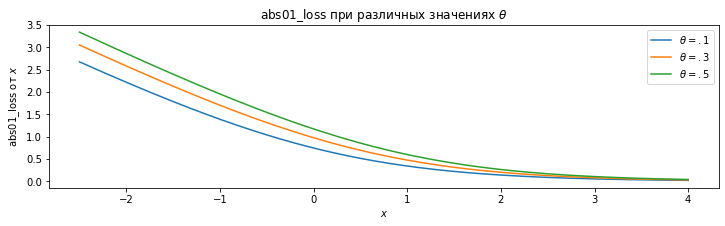

In [118]:
figsize(12, 3)
def logist_loss(x, teta): #  функция потерь
    return np.log(1 + np.exp(-(x - teta)))

x = np.linspace(-2.5, 4, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox

plt.plot(x, logist_loss(x, .1), label= r"$\theta = .1$")
plt.plot(x, logist_loss(x, .5), label= r"$\theta = .3$")
plt.plot(x, logist_loss(x, .8), label= r"$\theta = .5$")
plt.xlabel("$x$")
plt.ylabel("abs01_loss от $x$")
plt.title(r"abs01_loss при различных значениях $\theta$")
#plt.ylim(0, 1.2)
plt.legend()
plt.show()

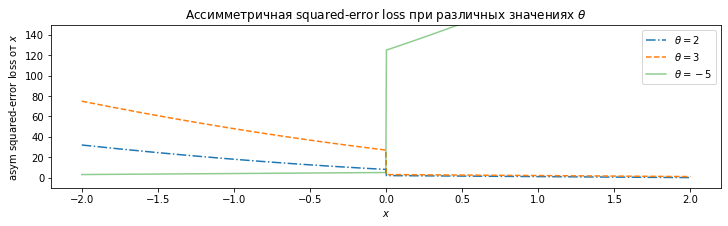

In [93]:
figsize(12, 3)
def nonlin_loss(true_value, estimate):
    if estimate*true_value > 0:
        return abs(estimate - true_value)
    else:
        return abs(estimate)*(estimate - true_value)**2



x = np.linspace(-2, 2, 1000) # 1000 точек на отрезке [-4 ; 4] оси Ox
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(nonlin_loss, otypes=[float]) 


plt.plot(x, y(x, 2), label= r"$\theta = 2$", ls = "-.")
plt.plot(x, y(x, 3), label= r"$\theta = 3$", ls = "--")
plt.plot(x, y(x, -5), label= r"$\theta = -5$", alpha = .53)
plt.xlabel("$x$")
plt.ylabel("asym squared-error loss от $x$")
plt.title(r"Ассимметричная squared-error loss при различных значениях $\theta$")
plt.ylim(-10, 150)
plt.legend()
plt.show()

5.2.1.  Функции потерь на практике

5.2.2.   Пример: оптимизация для раунда «Витрина» 
в викторине «Справедливая цена»

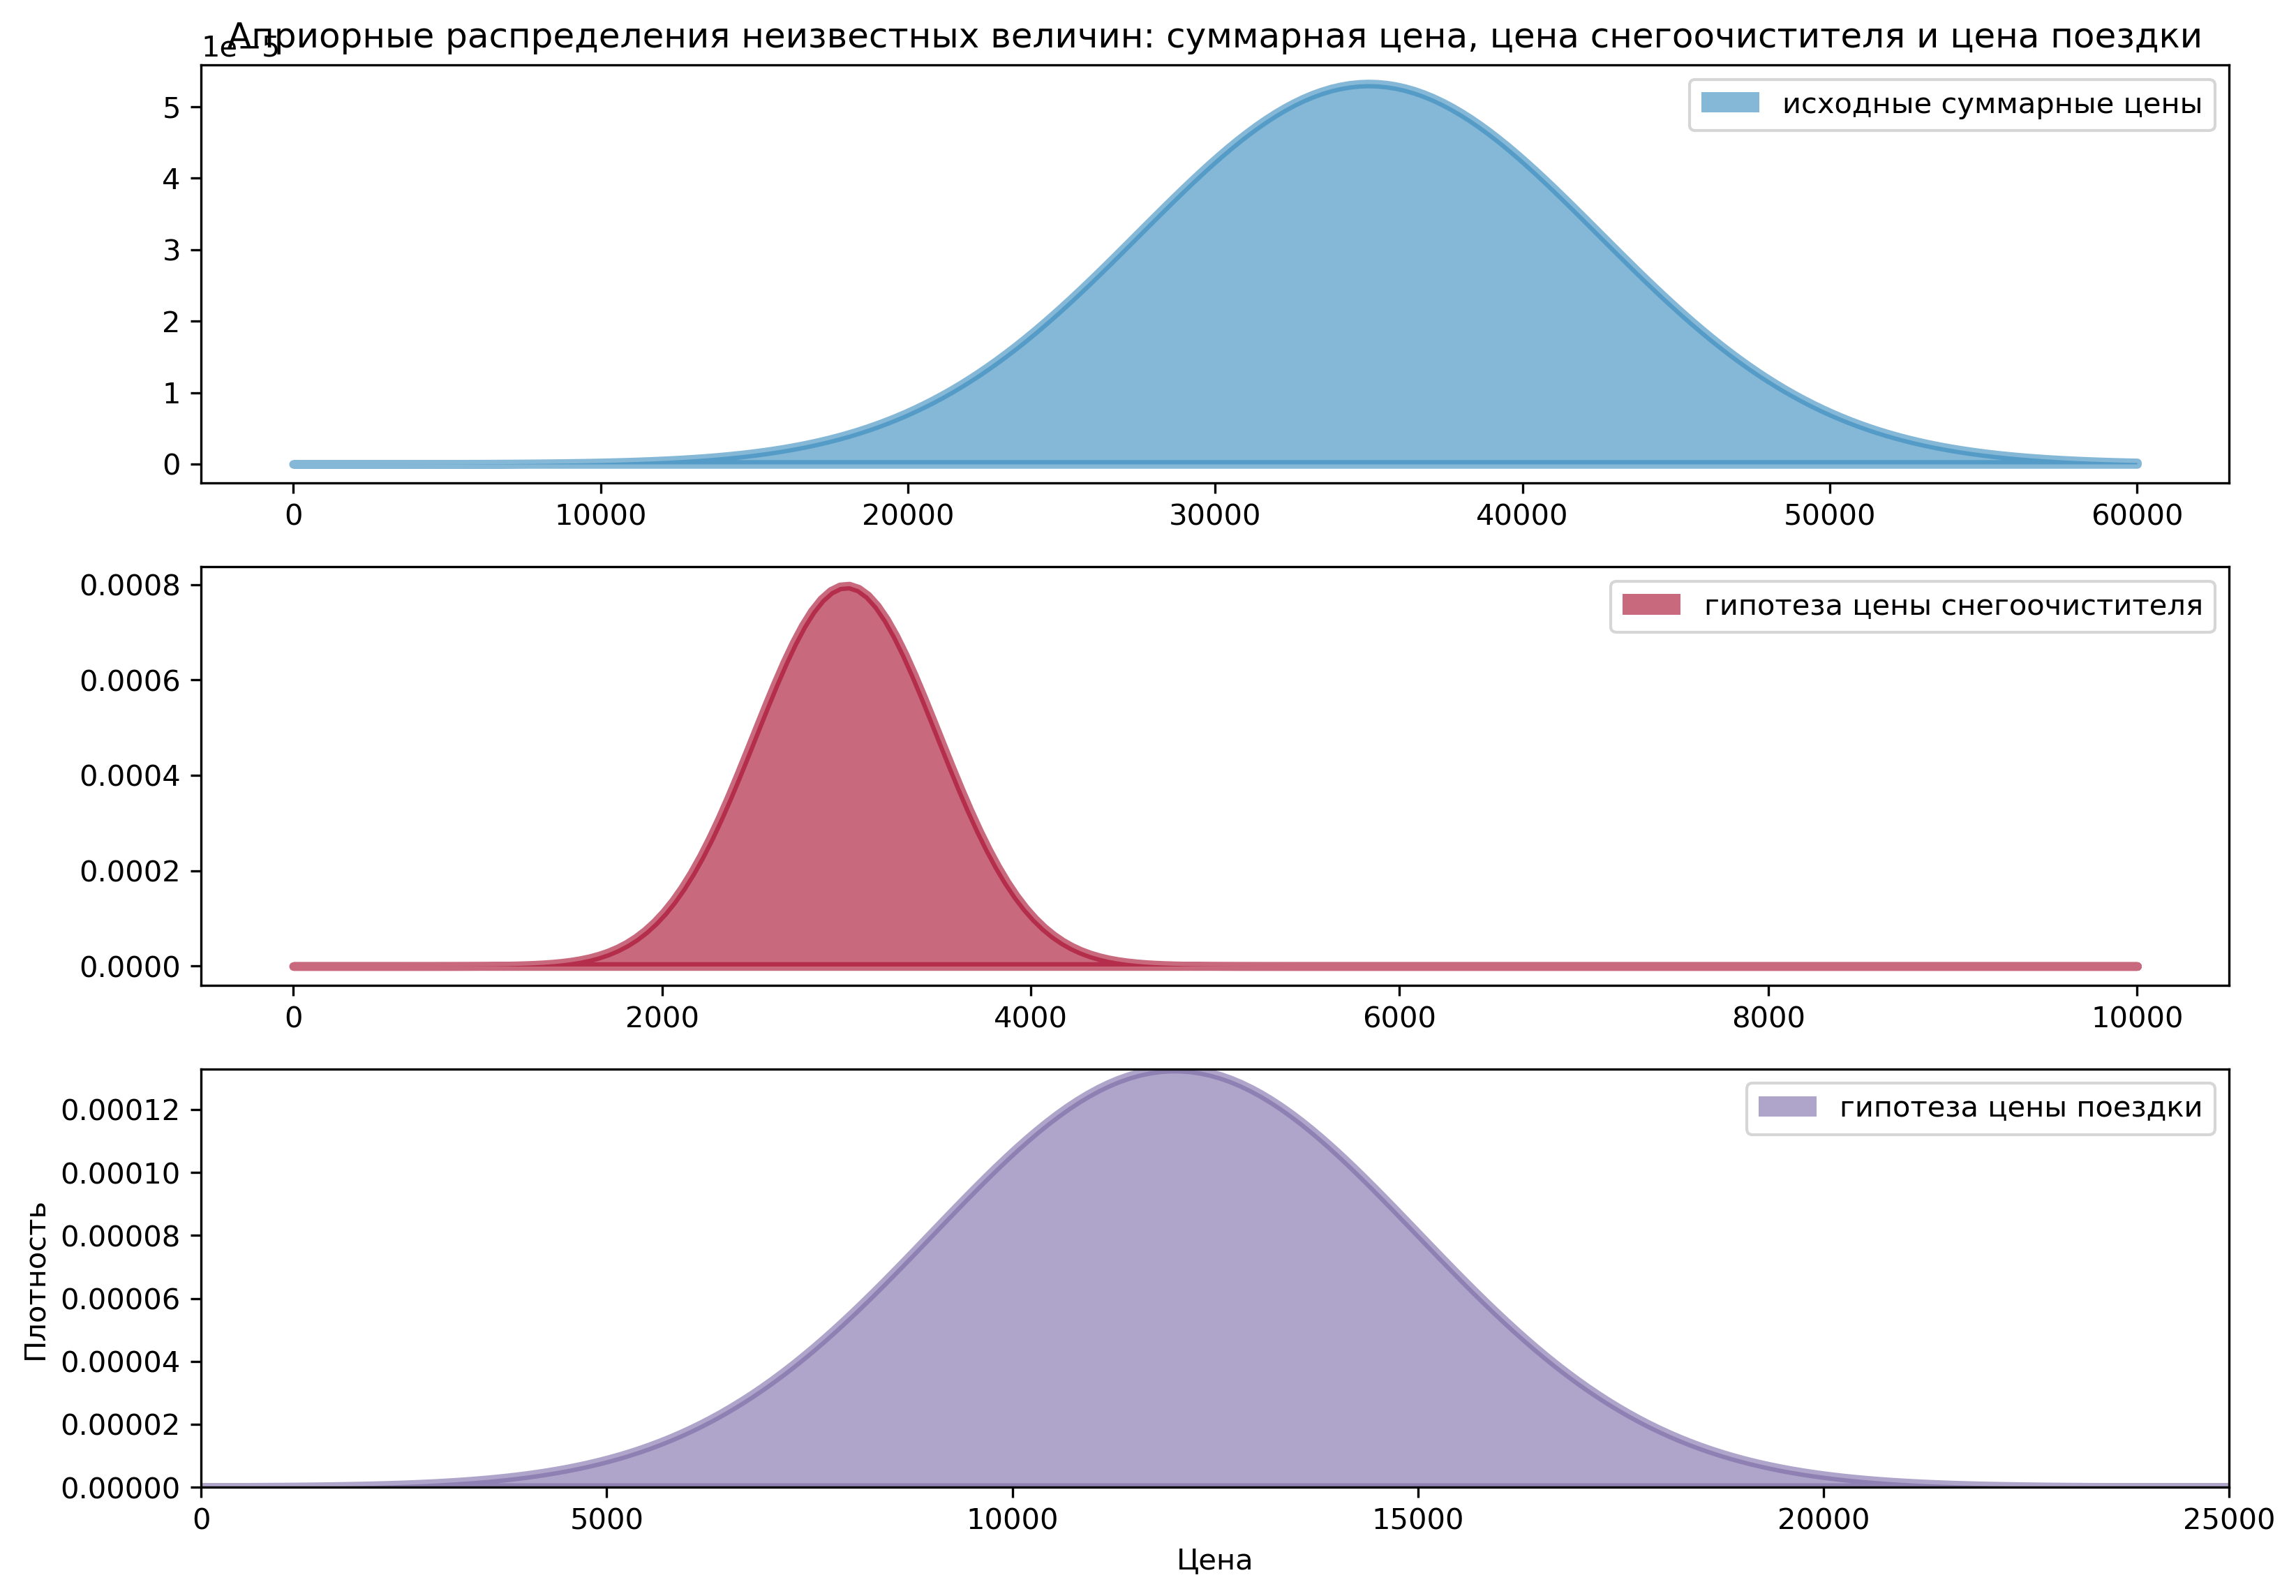

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
figsize(12.5, 9)

norm_pdf = stats.norm.pdf
plt.subplot(311)
x = np.linspace(0, 60000, 200)

sp1 = plt.fill_between(x, 0, norm_pdf(x, 35000, 7500),
                       color="#348ABD", lw=3, alpha=0.6,
                       label=u"исходные суммарные цены")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.title(u"Априорные распределения неизвестных величин: \
суммарная цена, цена снегоочистителя и цена поездки")
plt.legend([p1], [sp1.get_label()])
plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x, 0, norm_pdf(x, 3000, 500),
                       color="#A60628", lw=3, alpha=0.6,
                       label=u"гипотеза цены снегоочистителя")
p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])
plt.subplot(313)
x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf( x, 12000, 3000),
                       color="#7A68A6", lw=3, alpha=0.6,
                       label=u"гипотеза цены поездки")
plt.autoscale(tight=True)
p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])

plt.legend([p3], [sp3.get_label()]);
plt.xlabel(u"Цена");
plt.ylabel(u"Плотность");

Напишем код PyMC для вывода фактической цены набора

In [165]:
import pymc as pm

data_mu = [3e3, 12e3]# =[3000.,12000.]

data_std = [5e2, 3e3]# =[500.,3000.]

# Априорное распределение для фактической цены ~ Normal(µp, σp).
# Допустим для начала, что µp = 35 000, а σp = 7500.
mu_prior = 35e3 # =35000.
std_prior = 75e2 # =7500.

true_price = pm.Normal("true_price", mu_prior, 1.0 / std_prior ** 2)

# Априорное распределение цен призов
prize_1 = pm.Normal("first_prize", data_mu[0], 1.0 / data_std[0] ** 2)
prize_2 = pm.Normal("second_prize", data_mu[1], 1.0 / data_std[1] ** 2) 
price_estimate = prize_1 + prize_2


@pm.potential
def error(true_price=true_price, price_estimate=price_estimate):
        return pm.normal_like(true_price, price_estimate, 1 / (3e3) ** 2) # pm.normal_like(x, mu, tau)




In [144]:
?? pm.normal_like

In [143]:
?? pm.flib

In [166]:
mcmc = pm.MCMC([true_price, prize_1, prize_2, price_estimate, error])
mcmc.sample(50000, 10000)

price_trace = mcmc.trace("true_price")[:]

 [-----------------100%-----------------] 50000 of 50000 complete in 9.7 sec

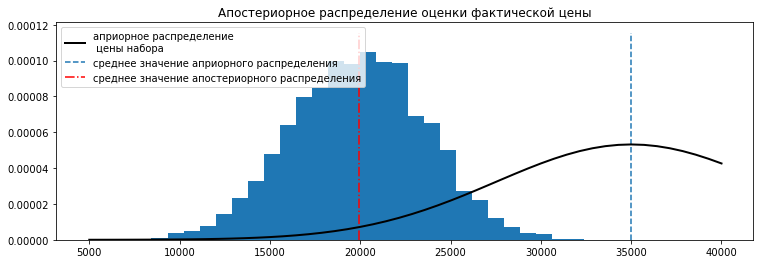

In [167]:
figsize(12.5, 4)
import scipy.stats as stats
# Строим график априорного распределения.
x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c="k", lw=2,
         label=u"априорное распределение\n цены набора")
# Строим график апостериорного распределения, представленного выборками из MCMC.
_hist = plt.hist(price_trace, bins=35, density=True, histtype="stepfilled")
plt.title(u"Апостериорное распределение оценки фактической цены")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label=u"среднее значение априорного распределения", linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
           label=u"среднее значение апостериорного распределения",
           linestyles="-.", color='r')
plt.legend(loc="upper left");

In [95]:
def showcase_loss(guess, true_price, risk=80000):
    if true_price < guess:
        return risk # потери = 80 000
    elif abs(true_price - guess) <= 250:
        return -2 * np.abs(true_price) # отрицательные потери (доход)
    else:
        return abs(true_price - guess - 250)

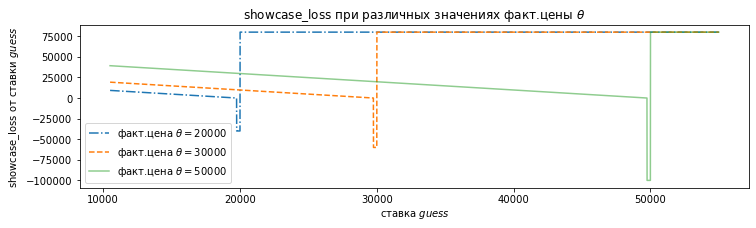

In [163]:
figsize(12, 3)

x = np.linspace(10500, 55000, 10000) # 1000 точек на отрезке [-100 ; 700] оси Ox
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(showcase_loss, otypes=[float]) 


plt.plot(x, y(x, 20000), label= r"факт.цена $\theta = 20000$", ls = "-.")
plt.plot(x, y(x, 30000), label= r"факт.цена $\theta = 30000$", ls = "--")
plt.plot(x, y(x, 50000), label= r"факт.цена $\theta = 50000$", alpha = .53)
plt.xlabel("ставка $guess$")
plt.ylabel("showcase_loss от ставки $guess$")
plt.title(r"showcase_loss при различных значениях факт.цены $\theta$")
#plt.ylim(-10, 15)
plt.legend()
plt.show()

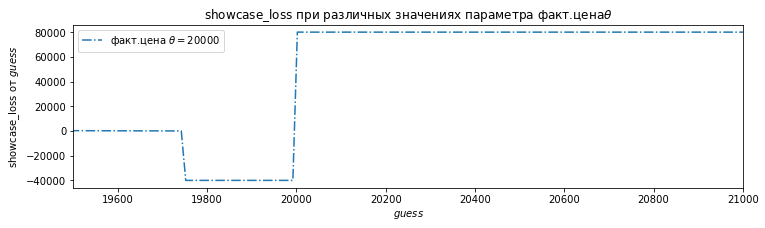

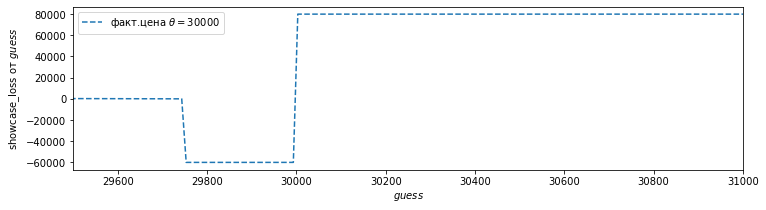

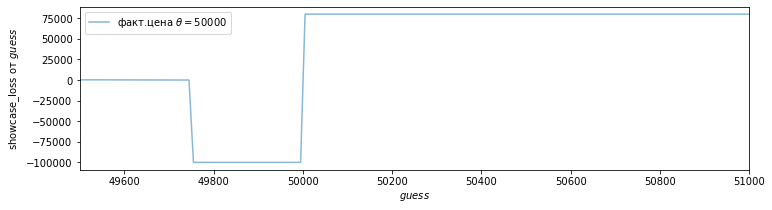

In [160]:
figsize(12, 3)

x = np.linspace(0, 100000, 10000) # 1000 точек на отрезке [-100 ; 700] оси Ox
# для построения графика кусочно-гладкой функции используется функция np.vectorize,
# которя возвращает ссылку на "векторизированную" функцию.
y = np.vectorize(showcase_loss, otypes=[float]) 


plt.plot(x, y(x, 20000), label= r"факт.цена $\theta = 20000$", ls = "-.")
plt.xlim(19500, 21000)
plt.title(r"showcase_loss при различных значениях параметра факт.цена$\theta$")
plt.xlabel("$guess$")
plt.ylabel("showcase_loss от $guess$")
plt.legend()
plt.show()

plt.plot(x, y(x, 30000), label= r"факт.цена $\theta = 30000$", ls = "--")
plt.xlim(29500, 31000)
plt.xlabel("$guess$")
plt.ylabel("showcase_loss от $guess$")
plt.legend()
plt.show()

plt.plot(x, y(x, 50000), label= r"факт.цена $\theta = 50000$", alpha = .53)
plt.xlim(49500, 51000)
plt.xlabel("$guess$")
plt.ylabel("showcase_loss от $guess$")


plt.legend()
plt.show()

In [221]:
# ОПЕРАЦИИ СО СПИСКАМИ И КОРТЕЖАМИ В NUMPY!!!

list1 = np.array([12,34,34,45,56,67,57,46])
iy = list1 < 50 #[ True  True  True  True False False False  True]
print('iy=', iy) 
loss = np.zeros_like(list1) #[0 0 0 0 0 0 0 0]
print('loss=', loss)
print('loss[~iy]=',loss[~iy]) # часть списка loss где ~iy[] = True
print('list1[~iy]=', list1[~iy]) # [56 67 57] часть списка list1 где ~iy[] = True

loss[~iy] = np.abs(50 - list1[~iy]) # поэлементно с этими частями производим мат.операции 
print('loss=', loss) #[ 0  0  0  0  6 17  7  0] - результат предыдущих преобразований
close_mask = abs(list1 - 50) <= 25 # [False  True  True  True  True  True  True  True]
print('close_mask =', close_mask, type(close_mask),len(close_mask))


#=======================================================
'''
<ipython-input-216-51a298d5ef00>: 9: Предупреждение о будущем: 
использование последовательности, отличной от кортежа, для многомерного индексирования 
не рекомендуется; используйте `arr [tuple (seq)]` вместо `arr [seq]`. 
В будущем это будет интерпретироваться как индекс массива, `arr [np.array (seq)]`, 
что приведет либо к ошибке, либо к другому результату.
'''
# tuple_0 = tuple(close_mask)
print('tuple_0 =', tuple_0, type(tuple_0), len(tuple_0))

print('loss[tuple_0] =', loss[tuple_0])
print('list1[tuple_0]=', list1[tuple_0])

loss[tuple_0] = -2 * list1[tuple_0]
print('loss=', loss, type(loss))



iy= [ True  True  True  True False False False  True]
loss= [0 0 0 0 0 0 0 0]
loss[~iy]= [0 0 0]
list1[~iy]= [56 67 57]
loss= [ 0  0  0  0  6 17  7  0]
close_mask = [False  True  True  True  True  True  True  True] <class 'numpy.ndarray'> 8
tuple_0 = (array([ True,  True,  True,  True,  True,  True,  True,  True]),) <class 'tuple'> 1
loss[tuple_0] = [ 0  0  0  0  6 17  7  0]
list1[tuple_0]= [12 34 34 45 56 67 57 46]
loss= [ -24  -68  -68  -90 -112 -134 -114  -92] <class 'numpy.ndarray'>


ставки = [ 5000.          7368.42105263  9736.84210526 12105.26315789
 14473.68421053 16842.10526316 19210.52631579 21578.94736842
 23947.36842105 26315.78947368 28684.21052632 31052.63157895
 33421.05263158 35789.47368421 38157.89473684 40526.31578947
 42894.73684211 45263.15789474 47631.57894737 50000.        ]
--------------------------------------------------------------------------------
риски = [ 30000.  54000.  78000. 102000. 126000. 150000.]


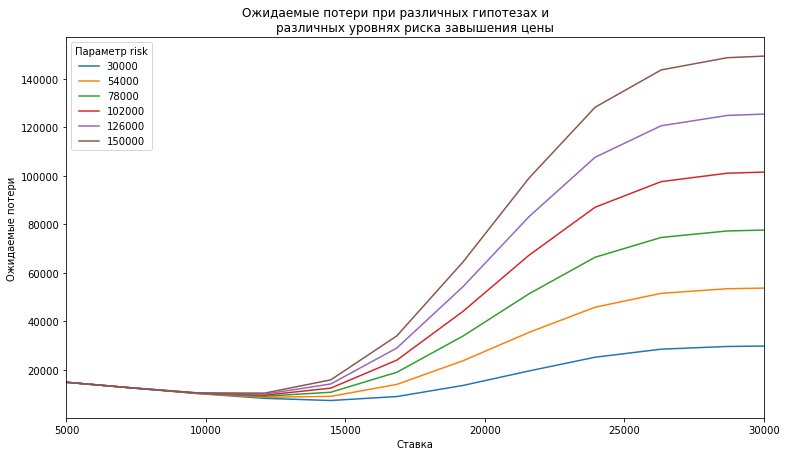

In [241]:
figsize(12.5, 7)
# Функция showdown_loss (NumPy) 
# Строим вектор (список) потерь
def showdown_loss(guess, true_price, risk=80000): # showdown_loss(число, список, число)
        loss = np.zeros_like(true_price) # нулевой список array([0., 0., 0., ..., 0., 0., 0.])
        ix = true_price < guess # логический список array([ True,  True,  True,  ..., False, False, False])
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = abs(true_price - guess) <= 250 # еще один логический список array([ True,  True,  True,  ..., False, False, False])
        loss[close_mask] = -2 * true_price[close_mask] # по предыдущему лог. списку        
        loss[ix] = risk #оставшаяся часть вектора потерь
        return loss # находим среднее значений результирующего списока
    
guesses = np.linspace(5000, 50000, 20)
risks = np.linspace(30000, 150000, 6)
print ('ставки =', guesses)
print('--'*40)
print('риски =', risks)

# lambda-функция, вычисляющая среднее значений вектора потерь
# 𝑙(𝜃̂^)=𝐸_𝜃[𝐿(𝜃,𝜃̂^)]
expected_loss = lambda guess, risk: showdown_loss(guess, price_trace, risk).mean()

for _p in risks:
    results = [expected_loss (_g, _p) for _g in guesses]
    plt.plot(guesses, results, label="%d"%_p)
plt.title(u"Ожидаемые потери при различных гипотезах и\
          \nразличных уровнях риска завышения цены")
plt.legend(loc="upper left", title=u"Параметр risk")
plt.xlabel(u"Ставка")
plt.ylabel(u"Ожидаемые потери")
plt.xlim(5000, 30000);

Минимизация потерь.

minimum at risk 30000: 14696.53
minimum at risk 54000: 12961.01
minimum at risk 78000: 12612.93
minimum at risk 102000: 12142.16
minimum at risk 126000: 12011.56
minimum at risk 150000: 10893.28


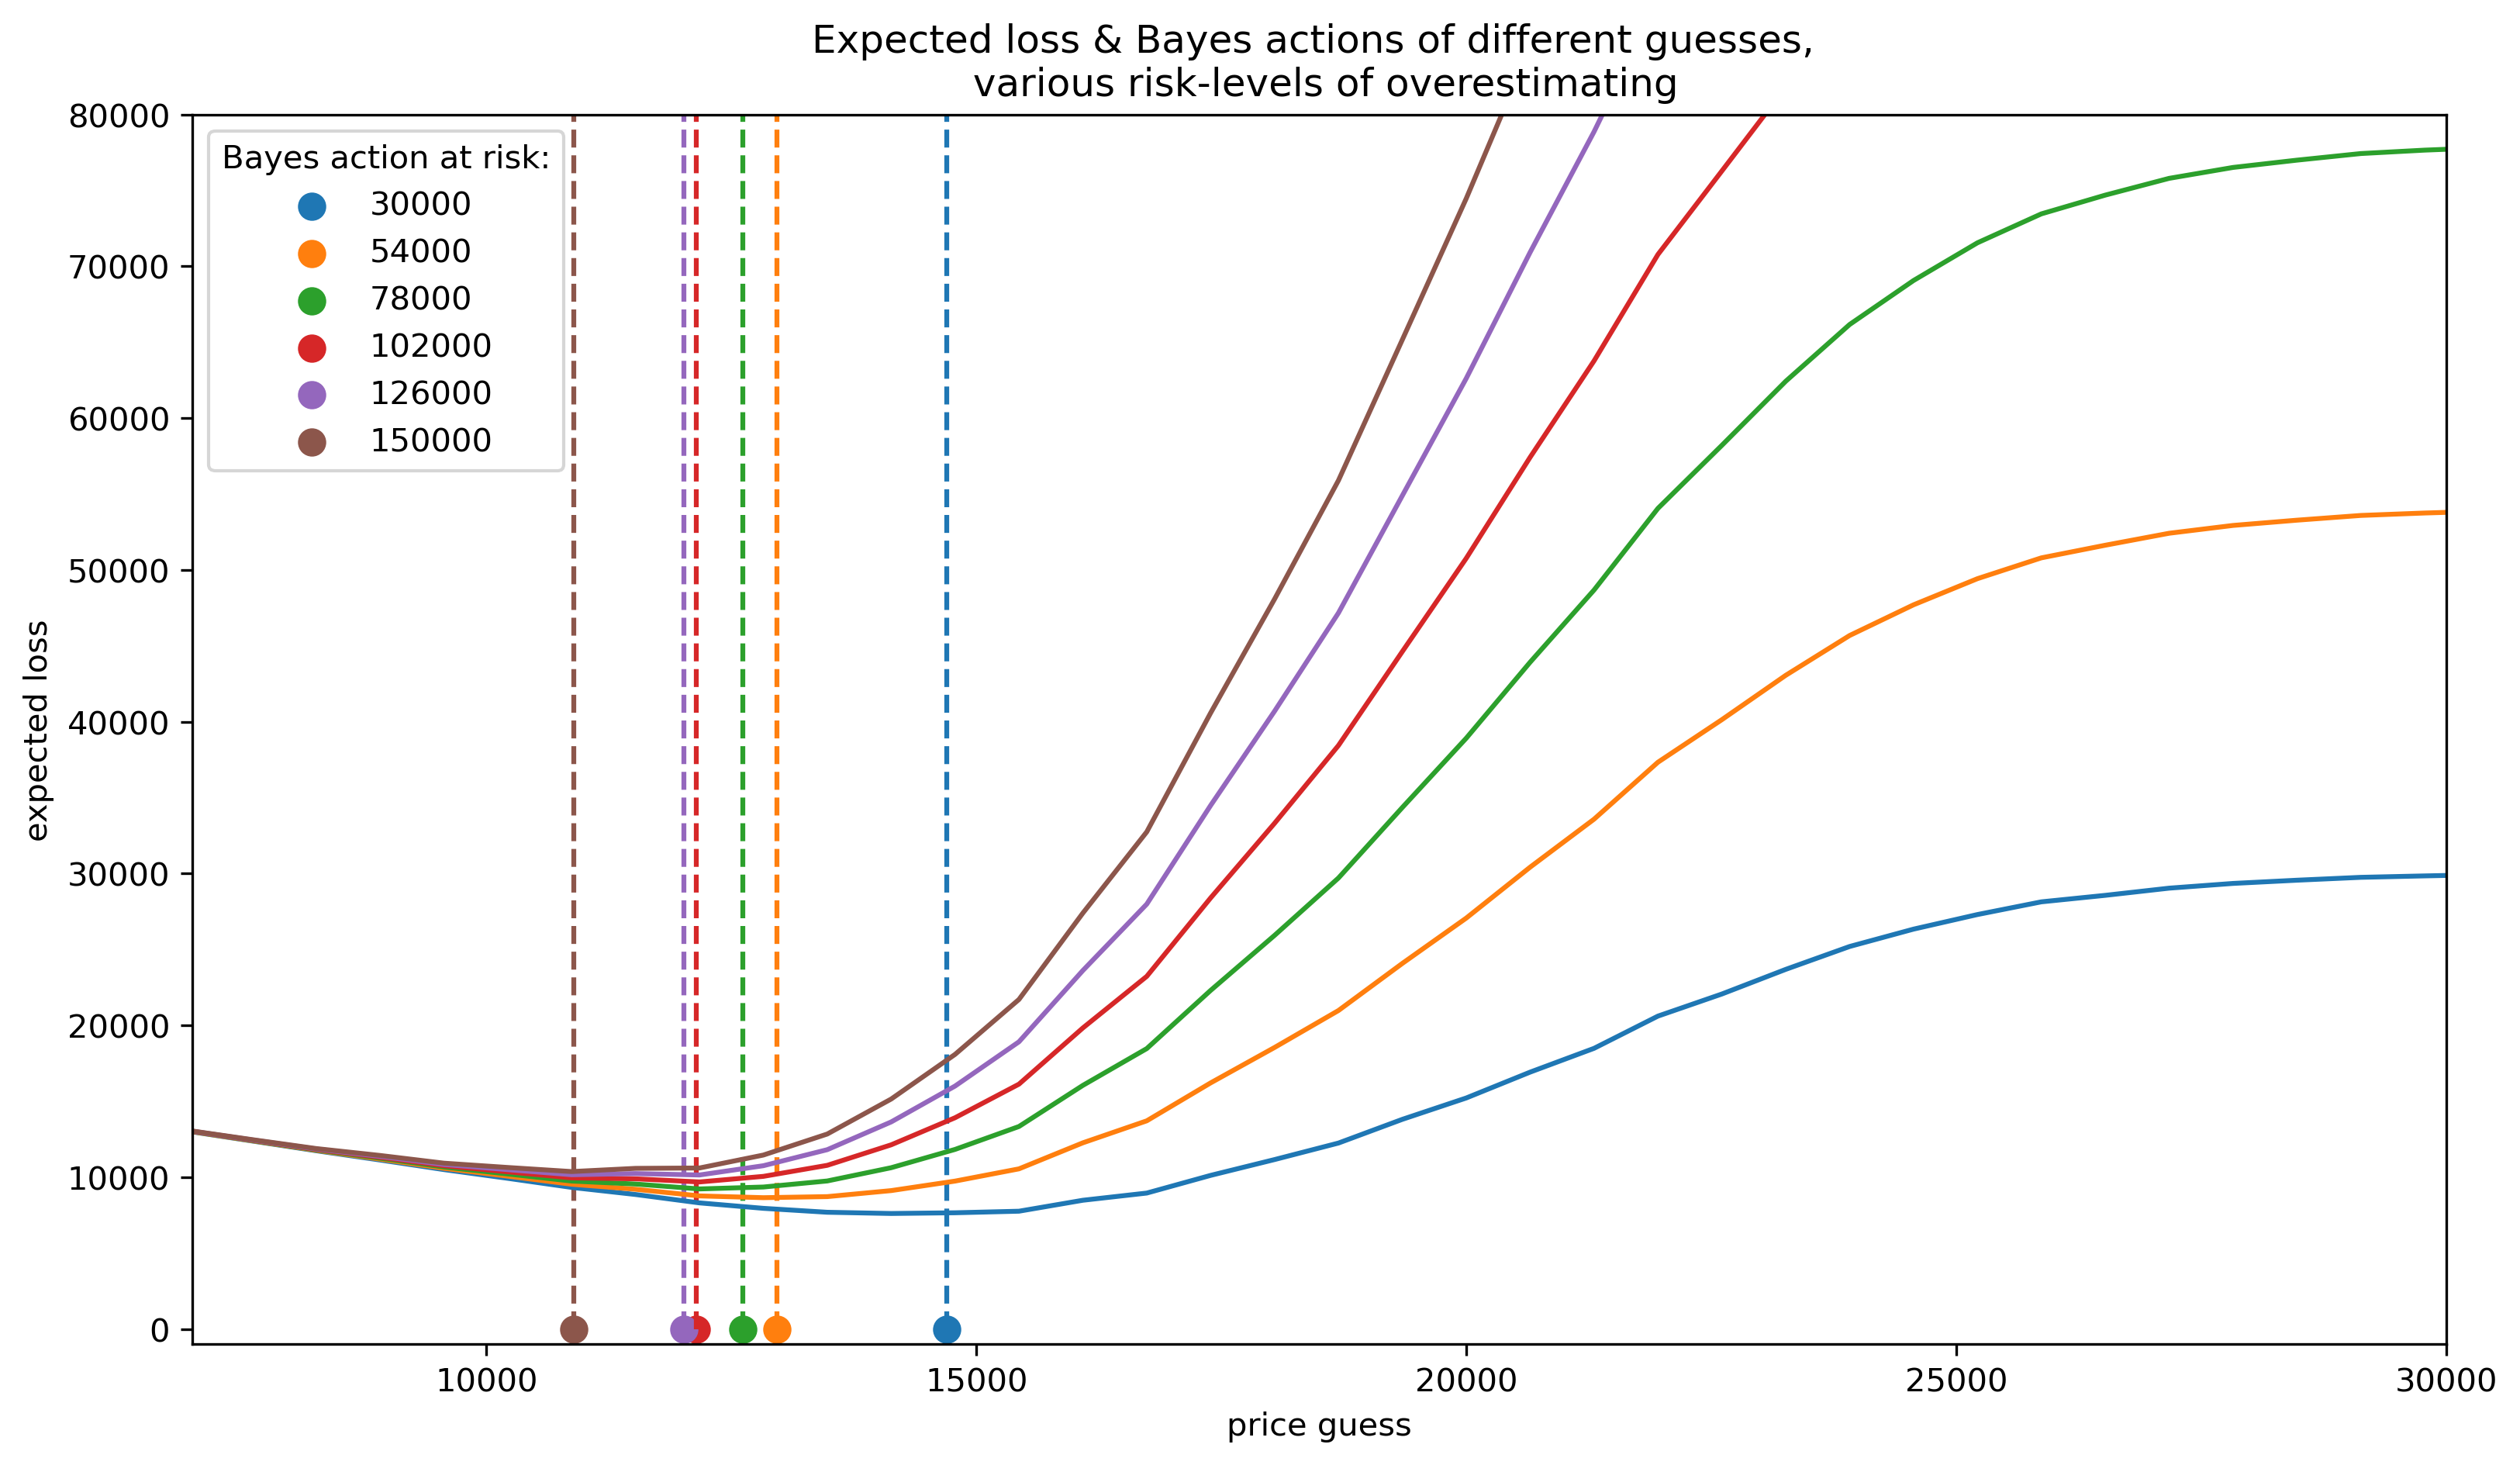

In [13]:
import scipy.optimize as sop

ax = plt.subplot(111)


for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,),disp = False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60, \
                color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))

plt.title("Expected loss & Bayes actions of different guesses, \n \
various risk-levels of overestimating")
plt.legend(loc="upper left", scatterpoints=1, title="Bayes action at risk:")
plt.xlabel("price guess")
plt.ylabel("expected loss")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);

Упрощенные способы